
## FINANCIAL ECONOMETRICS
MODULE 2 | LESSON 3

---

# **PENALIZED REGRESSION**



|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | OLS linear regression, Linear Algebra  |
|**Keywords** | High dimensional data, Overfitting, Training dataset vs Testing dataset, Penalized Function, <BR> Shrinkage, Regularization parameter, Variance and bias trade off, K-Fold Cross Validation, <BR> Ridge Regression, Lasso Regression |


---

*In the last two lessons, we talked about how to use weighted least regression and robust regression to handle unequal variance and outlier problems. In this lesson, we are going to study ridge regression and lasso regression. These two methods are usually used to tackle high dimensional data and overfitting issues. These issues in general happen due to too many variables or when many variables are correlated. We will first discuss these data issues and then introduce ridge regression and lasso regression. We will later use the dollar index example to run ridge regression and lasso regression.*



In [1]:
# Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [2]:
# Import data
data_set_r_working = pd.read_csv("M2. module_2_data.csv")

## **1. High Dimensional Data and Overfitting**

In the field of finance, a researcher can sometimes have a large number of independent variables at hand to analyze the dependent variable. For example, in risk management, one can have 300 or 400 potential variables to run a stress test for a bank. With this large number of independent variables, it is also likely that the number of variables would exceed the number of observations. **High dimensional data** is a dataset in which the number of variables is larger than the number of observations. If a dataset has $p$ variables and $n$ observations and $p > n$, then this dataset is high dimensional data. In machine learning literature, independent variables are also called **predictors,** **covariates**, **attributes** or **features**. In this course, we will refer to them as independent variables. 

If one uses a high dimensional dataset to run a regression, the model might perfectly predict the dependent variable because there are so many independent variables in the model. While these regression models capture the signal, they also tend to incorporate the noise.

**Figure 1: Simple Model vs Complicated Model**

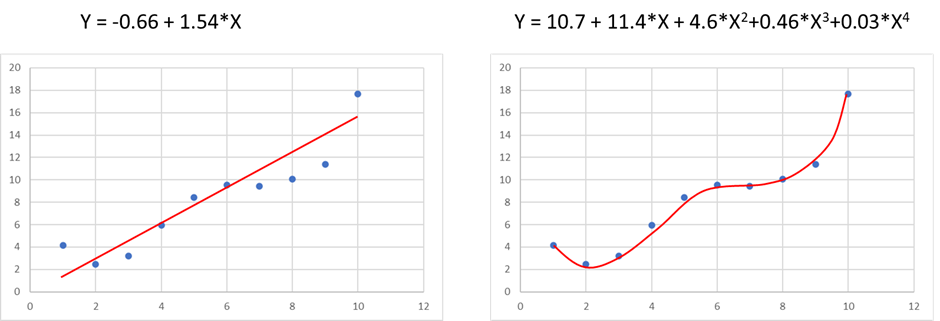


From Figure 1, you can see there are two models to model the same data points. The model on the left is a very simple model and only has one independent variable. The model on the right is complicated and has four independent variables. This model almost perfectly fits all data points. This model not only describes the overall trend but also captures the noise. As such, the model on the right presents an **overfitting** issue. An **overfitted** model is a model not only trying to find a relationship between the dependent variable and the independent variables but also trying to model the random error. When overfitting happens, usually the coefficients of the model are far away from $0$. 

But what is wrong with an overfitted model? Before talking about the problem of an overfitted model, we would like to introduce two concepts first: training dataset and testing dataset. A **training dataset** is the dataset we use to build our analytical models, like regression models. A **testing dataset** is a dataset we use to check a model's performance or a model's fit *after* we build the model. In research, it is standard procedure to split the dataset available for modeling into a training dataset and a testing dataset before building a model. Then, we use the training dataset to estimate the model and use the testing dataset to test the fit of the model. The split can be any ratio, say 50:50, 30:70 or 25:75. The reason is that you can build a model that provides a perfect fit for the training dataset. However, when you use the model on the testing dataset, the model prediction of the dependent variable from testing dataset might be very poor. This is because you are trying to model all the possible information from the training dataset, including both the signal and the error. When you build an overfitted model using the training dataset and use the overfitted model to predict the testing dataset, the prediction result can be bad. If a model cannot predict well, then the model is useless.

Another issue with too many independent variables in a regression model is that these independent variables are more likely to exhibit a multicollinearity issue. When multicollinearity exists, the variance of coefficients is large. Coefficients with a large variance will make statistical inference less accurate, like hypothesis testing.


## **2. Penalized Regression**

### **2.1 How Do We Tackle the Issue of Too Many Variables?**

We talked about the problem of having too many variables or high dimensional data for regression analysis in the last section. What can we do about this issue?

In Module 1, we talked about using principal component analysis or factor analysis, two data dimension reduction tools to solve high dimensional data issues. You first run either PCA or factor analysis to decide what variables to keep and run the linear regression model after you decide on the independent variables from PCA or factor analysis. 

In this lesson, we will introduce a different general method to handle the problem of too many variables: **penalized regression.** 


### **2.2 Basics of Penalized Regression**

When we have too many variables and use all of them to build a linear regression model, we run the risk of overfitting the model. In an OLS regression model, we try to minimize the following objective function:

$$ \sum_{i=1}^{n} (Y_{i} - \beta_{0} - \beta _{1} X_{1i} - \cdots - \beta_{p}X_{pi})^{2} $$

In the OLS objective function, we can see there is no restriction on how many $\beta$ (also independent variables) there are in the function. What if we assign some sort of penalty to each additional $\beta$ every time we add one new independent variable? Penalized regression uses an objective function like the following:

$$ \sum_{i=1}^{n} (Y_{i} - \beta_{0} - \beta _{1} X_{1i} - \cdots - \beta_{p} X_{pi})^{2} + \lambda \sum_{j=1}^{p} f(\beta_j) $$


#### **2.2.1 Penalty Function**

$f() $ is called a **regularization function** or **penalty function**. A **penalty function** will try to pull the value of a coefficient close to $0$ if the value is too large. The function basically tries to reduce the impact of an independent variable in the model if the coefficient of this independent variable is too large. It is a function that penalizes the existence of an independent variable in a model by suppressing the value of its coefficient. In an extreme case, this function may pull the coefficient to $0$. When the coefficient is $0$, it means the independent variable is removed from the model. The action of pulling a coefficient value towards $0$ or to a certain preset value is called **shrinkage**, in that you shrink a coefficient.

There are several types of penalty functions. We are going to talk about the two most popular ones in the later sections: ridge regression and lasso regression. 


#### **2.2.2 Regularization Parameter**

What is $\lambda$? $\lambda$ is a **regularization parameter**. It controls the **trade-off of variance and bias** for coefficients. What does this mean? In an ideal model, we would like to achieve an accuracy for the estimated coefficients that is as high as possible and as low as possible for standard errors of such estimated coefficients.

In OLS, the estimated coefficients are unbiased, which means they are accurate. However, the variance of the coefficients can be very high if there are too many variables in the model, as we argued in the previous section. An OLS objective function provides accurate coefficient estimates but not stable estimates (high variance). On the other hand, a penalty function can suppress the coefficient estimates from going too far away from $0$. We can see from the penalized regression objective function that there is the original OLS objective function as well as a penalty function. An OLS objective function gives accurate coefficient estimates with high variance. With the addition of the penalty function to the penalized regression objective function, this objective function will produce coefficient estimates with lower variance. However, the coefficient estimates from penalized regression will be biased. 

Why does a penalized regression objective function produce biased coefficient estimates? Because its ability to pull coefficient estimates closer to $0$ will prevent the model from fully minimizing the sum of the distances from the regression line to all data points. This is also the reason we have the penalty function in the penalized regression objective function. We don't want to put too much emphasis on the noisy part of the data.

So how can we balance the trade-off between bias and variance of the estimated coefficients? We use $\lambda$ to balance the two forces. We can use a graph to illustrate the impact of the value of $\lambda$ on total error.


**Figure 2: Trade-Off Graph between Variance and Bias in Penalized Regression**

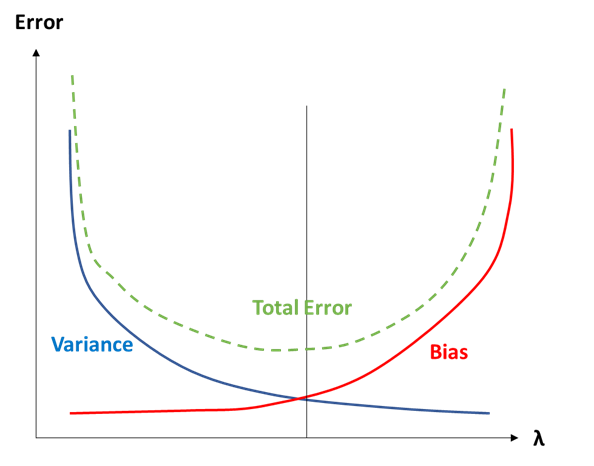


From Figure 2, we can see that as $\lambda$ goes to $0$, the error from variance gets larger and the error from bias gets smaller and vice versa. We would like to find the middle point of $\lambda$ that will give us the lowest total error. So how can we find the optimal $\lambda$?


#### **2.2.3 Standardize Independent Variables**

Before moving on to discuss how to find the optimal $\lambda$, there are steps we need to take to prepare the dataset before we model. The first thing is that the penalty function shouldn't include the intercept, $\beta_{0}$. In general, we don't penalize $\beta_{0}$.

Another important step to take is that of standardizing all independent variables. We talked about how the penalty function will pull the value of a coefficient closer to $0$ if the value is too large. In order for this action to make sense, all independent variables need to be standardized to remove the fact that they could have different scales.

Some statistical software packages may conduct independent variable standardization automatically while running a penalized regression. Please check the manual for the specific software package you decide to use for more information.


#### **2.2.4 K-Fold Cross Validation to Find Optimal $\lambda$**

How can we find the optimal $\lambda$? We can use a method called **k-fold cross validation**. You can choose any number for $k$. Usually, 5 and 10 are popular numbers for $k$. Let's use 5-fold cross validation as an example to explain how it works.

Let's assume that $\lambda$ is a value between $0$ and $20$. We will try each of the following $\lambda$: (0, 0.25, 0.5, 0.75, ... , 19.75, 20). There will be a total of 80 values to try for $\lambda$.

The next thing we need to do is to divide our dataset equally into five groups for 5-fold cross validation.

Say that our dataset contains 100 observations. Then, we will create 5 groups each containing 20 observations. Let's call our 5 groups A, B, C, D, and E. 

We also have the penalized regression objective function:

$$ \sum_{i=1}^{n} (Y_{i} - \beta_{0} - \beta _{1} X_{1i} - \cdots - \beta _{p} X_{pi})^{2} + \lambda \sum_{j=1}^{p} f(\beta_j) $$

Now, we have our possible $\lambda$ values to test, five equal groups from our data, and a penalized regression objective function. We are ready to run iterations to generate optimal $\lambda$.

Here are the steps to generate optimal $\lambda$:

1. Choose $\lambda = 0$
2. Choose A as the testing dataset and B, C, D, and E together as the training dataset.
3. Build a penalized regression model using the training dataset.
4. Plug testing dataset A into the fitted model from step 3 and calculate the sum of residuals squared from the fitted model. Keep the sum of squared residuals.
5. Go back to step 2, and this time, select the next group, B, to be the testing dataset and A, C, D, and E together as the training dataset. Now, repeat steps 3, 4, and 5 until each of the five groups has been treated as a testing dataset.
6. Calculate the average sum of squared residuals from the recorded five values of the sum of squared residuals from each of the five different testing datasets.
7. Keep a record of $\lambda$ and its associated average sum of squared residuals.
8. Repeat from Step 1 to Step 7 to go through each possible value of $\lambda$
9. Now, you have 80 data points of $\lambda$ and its associated average sum of squared residuals. You can find the optimal $\lambda$ that gives the minimal value of the average sum of squared residuals. The optimal $\lambda$ will be used for the final penalized regression.

This is how 5-fold cross validation works. The same logic applies to $k$-fold cross validations. You equally divide the dataset into $k$ groups and follow the steps above to get the optimal $\lambda$. 

Most of the statistical packages can conduct $k$-fold cross validation for you so you don't have to do it manually. Some software will even choose optimal $\lambda$ for you without any specification about the range to test for $\lambda$. 

Finding a good $\lambda$ is critical to running a penalized regression. Since we now know how to obtain $\lambda$, we can start to look at various types of penalized regression methods. In the following sections, we will learn ridge regression and lasso regression. These two regressions are widely used penalized regression methods.


## **3. Ridge Regression**

In the last section, we talked about the basics of penalized regressions. We discussed regularization parameters, steps to process data, and k-fold cross validation. Now, we are going to look at various functions for a penalized regression objective function. We will start with ridge regression.

Ridge regression is one type of penalized regression. The penalty function for ridge regression is the sum of squared coefficients (betas). The mathematical formula is as follows:

$$ f() = \sum_{j=1}^{p}  \beta _{j}^{2} = \| \beta \|^{2} $$

The above penalty function is also called an **L2 penalty function**. It is because the function is the square of the magnitude of coefficients in the model. For the detailed coefficient derivation for ridge regression, please refer to the required reading from the [Penn State University, Eberly College of Science website](https://online.stat.psu.edu/stat508/Lesson06).

Here are some key properties of ridge regression:

1. Ridge regression shrinks the coefficients of the independent variables that don't contribute very much to the model close to $0$, but not $0$.
2. If $\lambda = 0$, then ridge regression estimation is OLS estimation.
3. All the independent variables are still in the model.
4. Ridge regression is a good method when a researcher wants to keep all independent variables but also wants to reduce variation of estimated coefficients due to multicollinearity issue. What ridge regression does is to restrict coefficients of correlated independent variables and make their estimated values smaller.

However, if you have too many independent variables and you would like to select only a few key independent variables for your model, lasso regression is a better choice.


## **4. Lasso Regression**

**Lasso regression** is short for **least absolute shrinkage and selection operator**. Lasso regression has the following penalty function:

$$ f() = \sum_{j=1}^{p} |\beta _{j}| = \| \beta \|_{1} $$

The above penalty function is also called an **L1 penalty function**. It is because the function is the absolute value of the magnitude of coefficients in the model. For more technical details on lasso regression, please refer to the required reading from the [Penn State University, Eberly College of Science website]( https://online.stat.psu.edu/stat508/lesson/5/5.4).

Here are some key properties of lasso regression:

1. Lasso regression can shrink the coefficients of the independent variables that don't contribute very much to the model to $0$. Hence, lasso regression can remove independent variables. Lasso regression can be used for variable selection.
2. If $\lambda = 0$, then a lasso regression estimation is an OLS estimation.
3. Lasso regression is a good choice when you have too many independent variables and you are looking to select only key variables for the model. Lasso regression can first group independent variables with high correlations together, choose only one of them for the model, and drop the rest.


## **5. An Example: Foreign Exchange Market and Penalized Regression**

We've talked a lot about ridge regression and lasso regression in the previous sections. Let's apply these two regression methods to our foreign exchange market example and see how they perform. In order to have a solid comparison for different regression methods, we'll also run an OLS regression as the base result and compare results from OLS, ridge regression and lasso regression.

We are going to expand our U.S. Dollar Index example by adding more independent variables in this section. Using the data from 2016, here is the list of our variables:

Dependent Variable:

**DXY**: U.S. Dollar Index daily return

Independent Variables:

- **METALS**: Gold and Silver Index daily return  <br>
- **US_STK**: S\&P 500 Index daily return <br>
- **X13W_TB**: 13-week Treasury Bills daily return <br>
- **X10Y_TBY**: 10 Year Treasury Bond Yield daily return <br>
- **EURUSD**: EURUSD daily return

We are going to have five independent variables in our regression models to understand their impact on the U.S. Dollar Index, DXY. We will run three regression models: OLS, ridge, and lasso.

Here are the steps to run the three models.

1. Split the data into a training dataset and a testing dataset. We split the whole dataset into 80% for training data and 20% for testing data.
2. We first run the OLS regression on the training dataset to get the OLS model. We record the OLS coefficients. Then, we plug the test dataset into the OLS model to calculate test $R^2$ and test root mean squared error.
3. We then run the ridge regression. We first set a range of values for $\lambda$. We then run 10-fold cross validation to get the optimal $\lambda$ from the training data. Once we get the optimal $\lambda$, we run the final ridge regression on the training data and get the coefficients. Once we get the ridge regression model, we plug test dataset into ridge regression model and calculate test $R^2$ and test root mean squared error.
4. Lastly, we run the lasso regression. We do the same as what we did for ridge regression. We set a range of values for $\lambda$ and run 10-fold cross validation to get optimal $\lambda$. We then run the final lasso regression and get the coefficients. After getting the lasso regression model, we plug in testing data to calculate test $R^2$ and test root mean squared error.


**Figure 3: Model Comparison from OLS, Ridge Regression, and Lasso Regression**


**Data preparation**<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [3]:
# Create Training Dataset and Testing Dataset

np.random.seed(11111)  # Random seed
nrow = data_set_r_working.shape[0]
train_sequence = sorted(np.random.choice(nrow, int(nrow * 0.8), replace=False))
test_sequence = sorted(set(list(range(0, nrow))) - set(train_sequence))

train = data_set_r_working.filter(items=train_sequence, axis=0)
test = data_set_r_working.filter(items=test_sequence, axis=0)

# Make sure X matrix is in matrix form and Y is in vector form
ind_var = ["METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"]

train_x = train.loc[:, ind_var]
train_y = train.DXY

test_x = test.loc[:, ind_var]
test_y = test.DXY

test_tot = test.loc[:, ["DXY", "METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"]]

**OLS Regression**

In [4]:
# OLS Regression
ols_final = sm.OLS(train_y, sm.add_constant(train_x)).fit()
print(ols_final.summary2().tables[1])  # print only coefficients

# Compute test R^2 and test mean squared error
ols_pred = ols_final.predict(sm.add_constant(test_x))
ols_pred = pd.DataFrame(ols_pred, columns=["ols_p"])
ols_actual = test.DXY

ols_rss = np.sum(np.power(ols_pred.ols_p - ols_actual, 2))
ols_tss = np.sum(np.power(ols_actual - np.mean(ols_actual), 2))
ols_rsq = 1 - (ols_rss / ols_tss)
print("\n OLS_R^2", ols_rsq)

ols_RMSE = np.sqrt(ols_rss / test.shape[0])
print(" OLS_RSME", ols_RMSE)

             Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
const     0.000410  0.000310  1.321022  1.880502e-01 -0.000202  0.001022
METALS   -0.070259  0.010999 -6.387663  1.219474e-09 -0.091952 -0.048566
US_STK   -0.058324  0.040419 -1.442997  1.506340e-01 -0.138040  0.021392
X10Y_TBY  0.019521  0.013955  1.398854  1.634535e-01 -0.008002  0.047045
X13W_TB   0.000696  0.003924  0.177426  8.593591e-01 -0.007044  0.008436
EURUSD   -0.087070  0.059863 -1.454492  1.474259e-01 -0.205135  0.030995

 OLS_R^2 0.10633201319436225
 OLS_RSME 0.00381807095301603


**Ridge Regression**

In [5]:
# Ridge Regression

# generate a sequence of lambdas to try
lambdas = [np.power(10, i) for i in np.arange(4, -4, -0.1)]
alphas = lambdas

# Scale
# train_x_scale = scale(train_x) #In case you want to scale the variables.

# Use 10-fold Cross Validation to find optimal lambda
ridge_cv = RidgeCV(alphas=alphas, cv=10, scoring="neg_mean_squared_error")
ridge_cv.fit(train_x, train_y)

# Build final ridge regression model
ridge_final = Ridge(alpha=ridge_cv.alpha_, fit_intercept=True)
ridge_final.fit(train_x, train_y)

# Print coefficients
# print('Intercept:', ridge_final.intercept_)
print(
    "\n",
    pd.DataFrame(
        (ridge_final.coef_),
        index=["METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"],
        columns=["Coef."],
    ),
)

# R squared formula and mean squared error
ridge_pred = ridge_final.predict(test_x)
ridge_actual = test.DXY
ridge_rss = np.sum(np.power(ridge_pred - ridge_actual, 2))
ridge_tss = np.sum(np.power(ridge_actual - np.mean(ridge_actual), 2))
ridge_rsq = 1 - ridge_rss / ridge_tss
print("\n Ridge_R^2", ridge_rsq)

ridge_RMSE = np.sqrt(ridge_rss / test.shape[0])
print("Ridge_RSME", ridge_RMSE)


              Coef.
METALS   -0.061364
US_STK   -0.016407
X10Y_TBY  0.015374
X13W_TB   0.001258
EURUSD   -0.012517

 Ridge_R^2 0.12384290357405436
Ridge_RSME 0.003780479486607715


**LASSO Regression**

In [6]:
# LASSO Regression

# generate a sequence of lambdas to try
lambdas = [np.power(10, i) for i in np.arange(6, -6, -0.1)]

# Compile model
lasso_cv = LassoCV(cv=10, alphas=lambdas)
lasso_cv.fit(train_x, train_y)  # Fit Model

# Scale
# train_x_scale = scale(train_x) #In case you want to scale the variables.

# Build final LASSO regression model
lasso_final = Lasso(alpha=lasso_cv.alpha_, fit_intercept=True)
lasso_final.fit(train_x, train_y)

# Print results
# print('Intercept:', lasso_final.intercept_)
print(
    "\n",
    pd.DataFrame(
        (lasso_final.coef_),
        index=["METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"],
        columns=["Coef."],
    ),
)

# R squared formula and mean squared error
lasso_pred = lasso_final.predict(test_x)
lasso_actual = test.DXY
lasso_rss = np.sum(np.power(lasso_pred - lasso_actual, 2))
lasso_tss = np.sum(np.power(lasso_actual - np.mean(lasso_actual), 2))
lasso_rsq = 1 - lasso_rss / lasso_tss
print("\n LASSO_R^2: ", lasso_rsq)

lasso_RMSE = np.sqrt(lasso_rss / test.shape[0])
print("LASSO_RSME: ", lasso_RMSE)


              Coef.
METALS   -0.059688
US_STK   -0.000000
X10Y_TBY  0.000000
X13W_TB   0.000000
EURUSD   -0.000000

 LASSO_R^2:  0.14151036558996766
LASSO_RSME:  0.00374216922006709


**All of the results in one table**

In [7]:
# All of the results in one table

OLS_df = pd.DataFrame(ols_final.summary2().tables[1]["Coef."]).rename(
    columns={"Coef.": "OLS"}
)

Ridge_df = pd.DataFrame(
    np.insert(ridge_final.coef_, 0, ridge_final.intercept_),
    index=["Intercept", "METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"],
    columns=["Ridge"],
)

Lasso_df = pd.DataFrame(
    np.insert(lasso_final.coef_, 0, lasso_final.intercept_),
    index=["Intercept", "METALS", "US_STK", "X10Y_TBY", "X13W_TB", "EURUSD"],
    columns=["Lasso"],
)

df = OLS_df.merge(Ridge_df, left_index=True, right_index=True)
df = df.merge(Lasso_df, left_index=True, right_index=True)

df = pd.concat(
    [
        df,
        pd.DataFrame(
            {
                "OLS": [ols_rsq, ols_RMSE],
                "Ridge": [ridge_rsq, ridge_RMSE],
                "Lasso": [lasso_rsq, lasso_RMSE],
            },
            index=["R sq", "Root Mean Sq. Err"],
        ),
    ]
)

display(df)  

,OLS,Ridge,Lasso
METALS,-0.070259,-0.061364,-0.059688
US_STK,-0.058324,-0.016407,-0.000000
X10Y_TBY,0.019521,0.015374,0.000000
X13W_TB,0.000696,0.001258,0.000000
EURUSD,-0.087070,-0.012517,-0.000000
R sq,0.106332,0.123843,0.141510
Root Mean Sq. Err,0.003818,0.003780,0.003742


Figure 3 shows the model results from our three methods. The table includes coefficients, test $R^2$ and test root mean squared error for OLS, ridge and lasso regressions. From Figure 3, we can see lasso has the best $R^2$ for the testing dataset, followed by ridge with OLS being the worst. We also notice that there is only one independent variable, *METALS*, which has a non-0 coefficient in lasso regression. Lasso only selects *METALS* for the regression model. Lasso makes the model very simple, yet it has the best fit for testing data. 



## **6. Conclusion**

In this lesson, we discussed the issue of high dimensional data and why it can cause an overfitting problem for a regression model. We then introduced the idea of penalized regression to handle issues with too many variables and overfitting. We went through the basics of penalized regression and then presented the two most popular methods: ridge regression and lasso regression. We showed their penalty functions, and their properties, and their differences. Lastly, we applied ridge regression and lasso regression to our U.S. Dollar Index model example. We compared the three regression results of our U.S. Dollar Index model: OLS, ridge and lasso. In the next lesson, we will continue our journey by exploring regression analysis and learning about non-parametric regression analysis.



---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
